In [194]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2015.csv


In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
df_5 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
df_6 = pd.read_csv('/kaggle/input/world-happiness/2016.csv')
df_7 = pd.read_csv('/kaggle/input/world-happiness/2017.csv')
df_8 = pd.read_csv('/kaggle/input/world-happiness/2018.csv')
df_9 = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

In [197]:
df_5.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [198]:
df_5['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [199]:
pd.DataFrame(dict(df['Region'].value_counts()).items(),columns=['Region','Numbers'])

,Region,Numbers
0,Sub-Saharan Africa,40
1,Central and Eastern Europe,29
2,Latin America and Caribbean,22
3,Western Europe,21
4,Middle East and Northern Africa,20
5,Southeastern Asia,9
6,Southern Asia,7
7,Eastern Asia,6
8,Australia and New Zealand,2
9,North America,2


In [200]:
df_5.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651

In [201]:
len(df['Country'].value_counts())

158

In [202]:
df_5 = df_5.drop(['Standard Error'], axis = 1)


In [203]:
df_5.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


We have dropped Standard Error column, because that data is unnecessary for us.

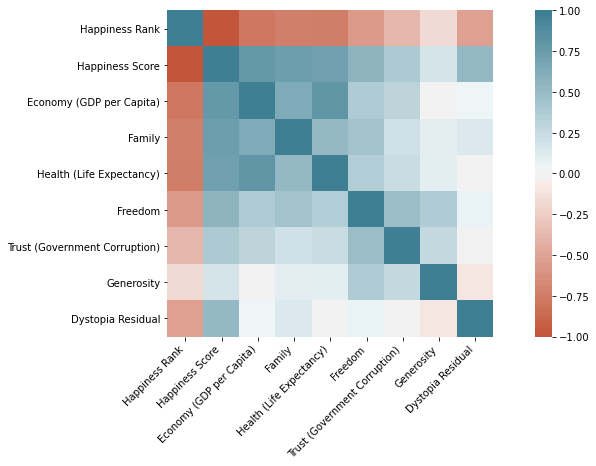

In [204]:
plt.figure(figsize = (15,6))
corr = df_5.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

This is a correlation table for the features of world happiness. We can see that Happiness Rank and Happiness Score are inversely proportional, lower the Happiness Rank, higher will be the Happiness Score, and higher the other seven factors. So let's remove the Happiness Rank and see the correlation of features again.

In [205]:
df = df_5.drop(['Happiness Rank'], axis =1)

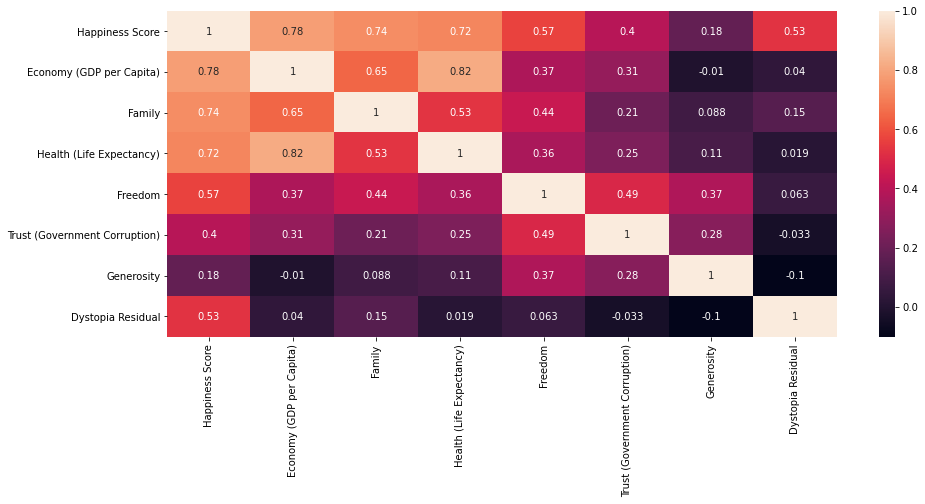

In [206]:
plt.figure(figsize = (15,6))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    annot=True  
)


According to this correlation plot, Economy, Family and Life Expectancy are the most important features, while generosity is the least important feature.

# Visualization


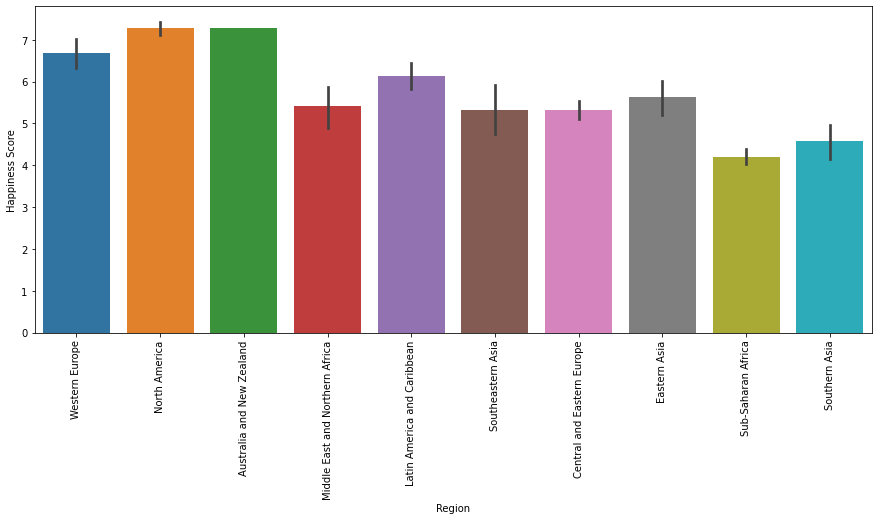

In [207]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x = 'Region',y='Happiness Score',data = df_5)
plt.xticks(rotation = 90)
plt.show()

North America, Australia and New Zealand have the most Happiness Score, hence they were the most happy region and Sub- Saharan Africa the least happy region in 2015.

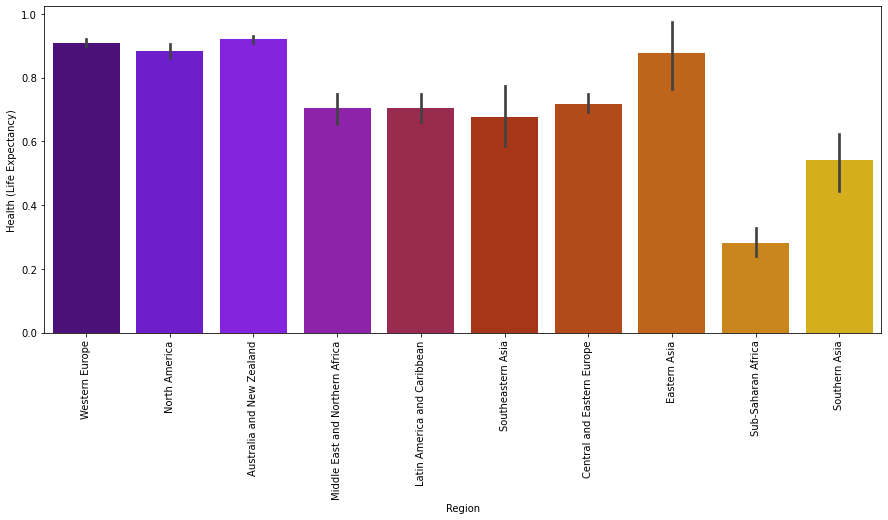

In [208]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Health (Life Expectancy)', data = df_5, palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Life Expectancy is least in Sub-Saharan Africa and Southern Asia in 2015.

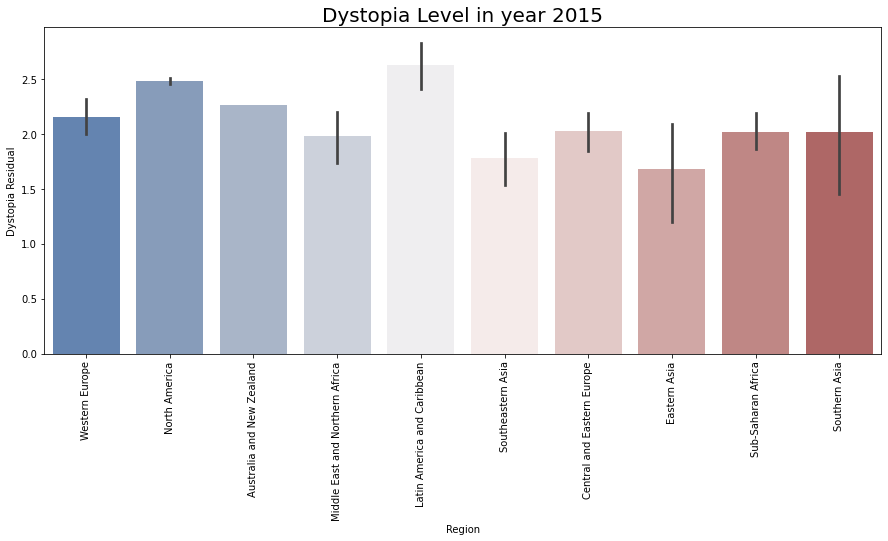

In [209]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Dystopia Residual', data = df_5, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('Dystopia Level in year 2015', fontsize = 20)
plt.show()

Dystopia Level is still most in Latin America and Carribean, regardless of this score this region has good Happiness Score level but an average Life Expectancy Level 

In [210]:
df_5.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


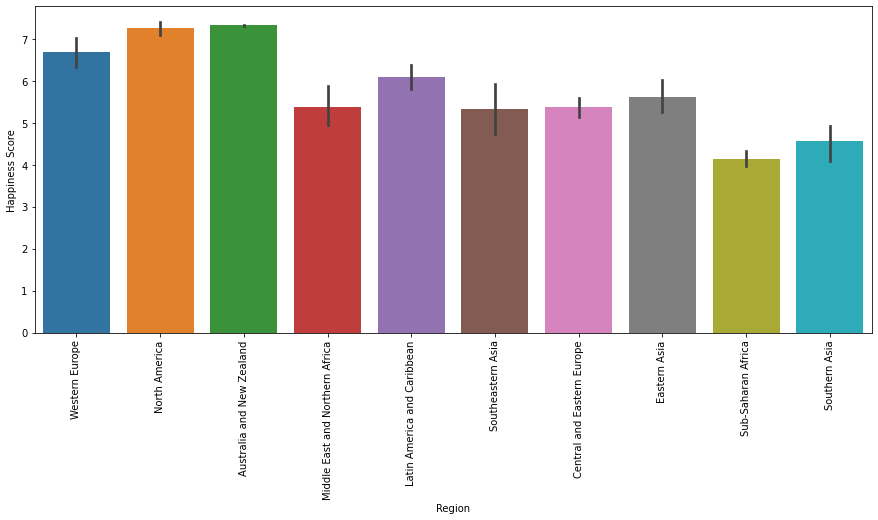

In [211]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x = 'Region',y='Happiness Score',data = df_6)
plt.xticks(rotation = 90)
plt.show()

North America, Australia and New Zealand again have the most Happiness Score, hence they were the most happy region and Sub- Saharan Africa the least happy region in 2016.

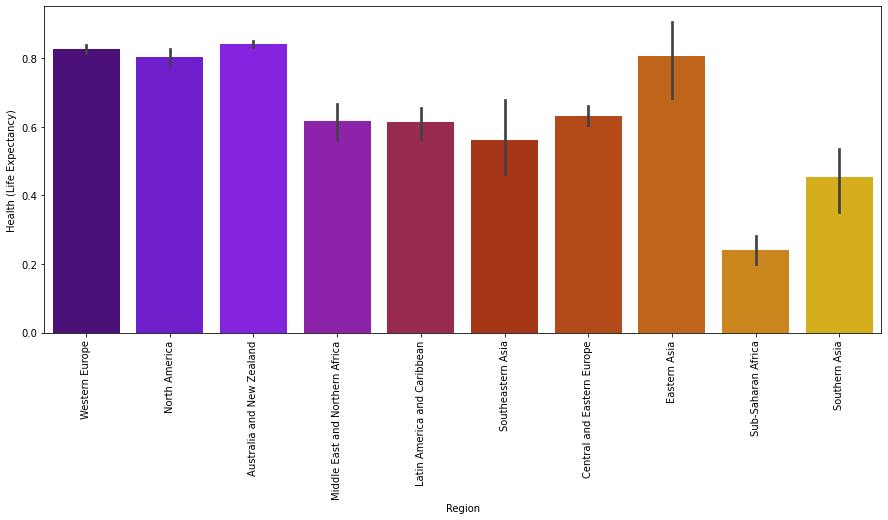

In [212]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Health (Life Expectancy)', data = df_6, palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Life Expectancy in year 2016 is similar to that of the previous year,i.e. Sub-Saharan Africa and Southern Asia have the least Life Expectancy.

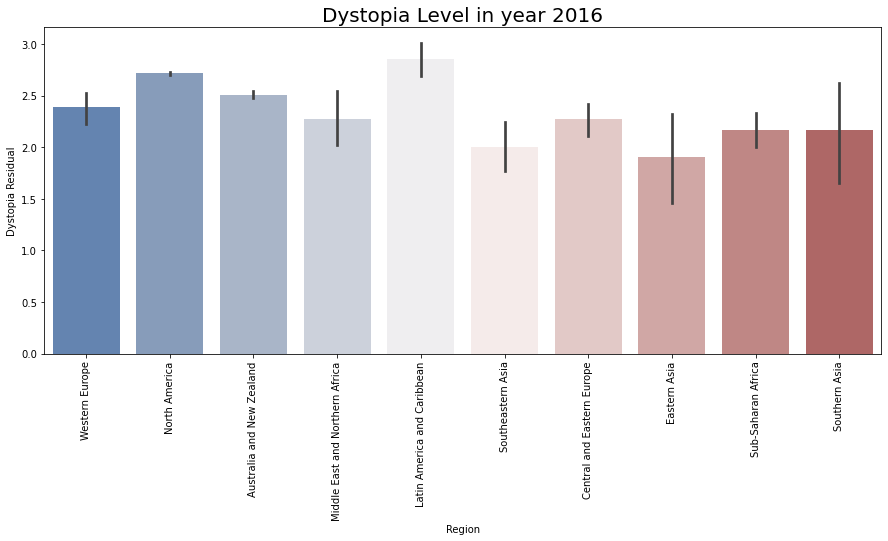

In [213]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Dystopia Residual', data = df_6, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('Dystopia Level in year 2016', fontsize = 20)
plt.show()

Dystopia Level is still most in Latin America and Carribean in 2016.

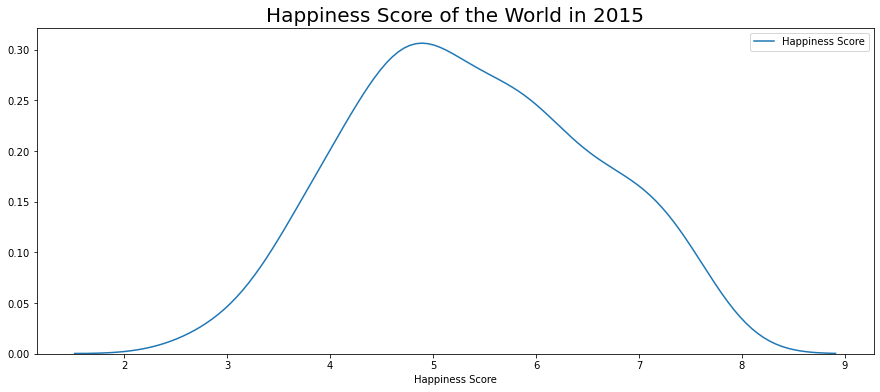

In [214]:
plt.figure(figsize = (15,6))
sns.kdeplot(df_5['Happiness Score'])
plt.title('Happiness Score of the World in 2015', fontsize = 20)
plt.xlabel('Happiness Score' )
plt.show()

Most countries have the happiness score value of around 5. 

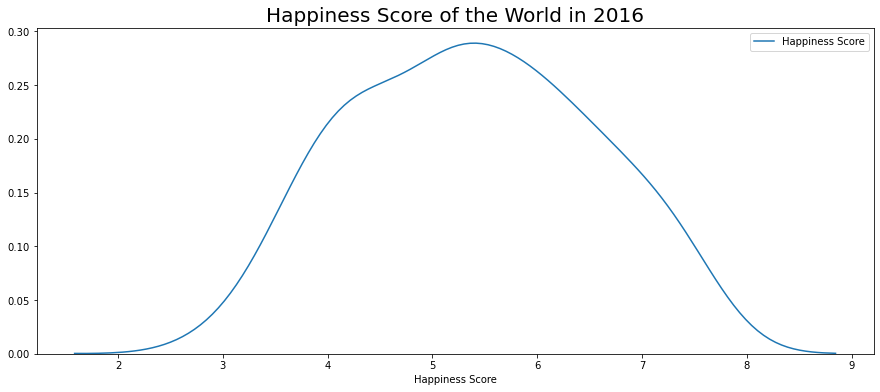

In [215]:
plt.figure(figsize = (15,6))
sns.kdeplot(df_6['Happiness Score'])
plt.title('Happiness Score of the World in 2016', fontsize = 20)
plt.xlabel('Happiness Score' )
plt.show()

The range of Happiness Score has increased in the year 2016, there are more score values of 4, 6 and 7. 

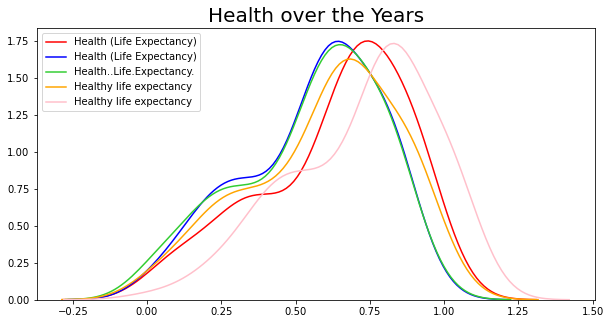

In [229]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_5['Health (Life Expectancy)'],color='red')
sns.kdeplot(df_6['Health (Life Expectancy)'],color='blue')
sns.kdeplot(df_7['Health..Life.Expectancy.'],color='limegreen')
sns.kdeplot(df_8['Healthy life expectancy'],color='orange')
sns.kdeplot(df_9['Healthy life expectancy'],color='pink')
plt.title('Health over the Years',size=20)
plt.show()

Life Expectancy has certainly increased over the years

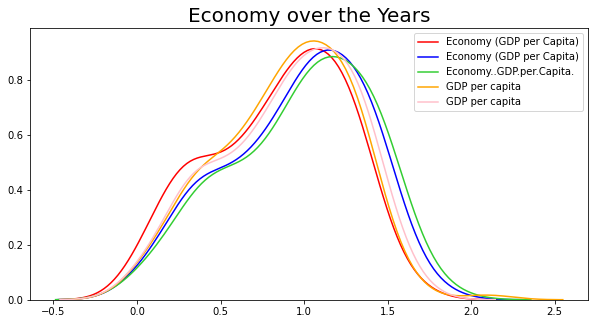

In [230]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_5['Economy (GDP per Capita)'],color='red')
sns.kdeplot(df_6['Economy (GDP per Capita)'],color='blue')
sns.kdeplot(df_7['Economy..GDP.per.Capita.'],color='limegreen')
sns.kdeplot(df_8['GDP per capita'],color='orange')
sns.kdeplot(df_9['GDP per capita'],color='pink')
plt.title('Economy over the Years',size=20)
plt.show()

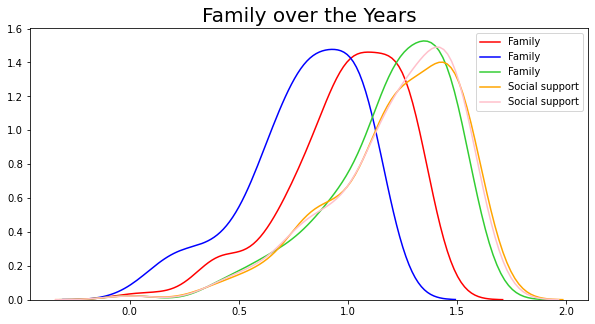

In [231]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_5['Family'],color='red')
sns.kdeplot(df_6['Family'],color='blue')
sns.kdeplot(df_7['Family'],color='limegreen')
sns.kdeplot(df_8['Social support'],color='orange')
sns.kdeplot(df_9['Social support'],color='pink')
plt.title('Family over the Years',size=20)
plt.show()

Text(0.5, 1.0, 'Life Expectancy vs Happiness Score in 2015')

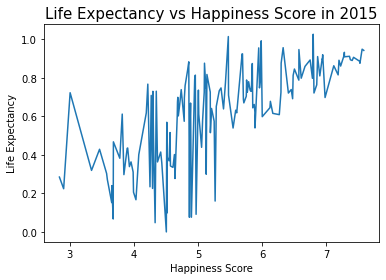

In [216]:
plt.plot(df_5['Happiness Score'], df_5['Health (Life Expectancy)'])
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Happiness Score in 2015', fontsize = 15)

Life Expectancy varies for Happiness Score in range (3.5 to around 5.3). This means that even with an average Happiness Score sometimes Life Expectancy is very low.

Text(0.5, 1.0, 'Life Expectancy vs Happiness Score in 2016')

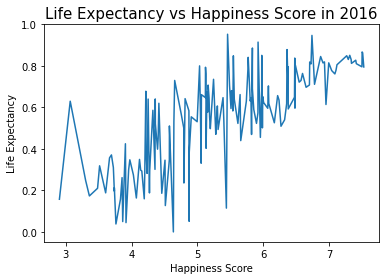

In [217]:
plt.plot(df_6['Happiness Score'], df_6['Health (Life Expectancy)'])
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Happiness Score in 2016', fontsize = 15)

There is reasonably a different variation as compared to year 2015. Life Expectancy is lower at Happniess Score value( 3.7 to 4 ).
Also Life expectancy is more at Happiness Score value (4 to 5.3)
The overall variation for Life Expectancy in year 2016 is from Happiness Score value of(3.7 - around 5.5)

In [218]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# Prediction Models

In [219]:
df_5.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


We will drop Country, Region, Happiness Rank from the table since these features are not important.

In [220]:
df_5 = df_5.drop(['Country','Region','Happiness Rank'], axis =1)

In [221]:
df_5.columns

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [222]:
X = df_5[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
      ]
y = df_5['Happiness Score']

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

Linear Regresion

In [224]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.9999999415792218

99% is a nearly perfect accuracy score.

In [225]:
y_pred = regressor.predict(X_test)

In [226]:
print(y_pred)

[4.30694172 5.98712333 4.19427572 2.90454181 5.05723202 6.57406807
 4.8975108  4.87600711 4.94873256 3.93081978 6.90135528 5.82830411
 6.98257237 5.54817084 6.78624053 6.50509462 4.50715603 4.68555975
 4.97107758 5.69533348 3.65506152 6.93737451 7.19983451 7.28401603
 6.48514055 5.1923227  5.8889795  3.95563261 4.3691513  3.68086523
 3.78081034 5.33249385 3.99479721 5.83266763 4.35000962 5.12885862
 3.3400272  6.12277795 5.60463826 4.55053903 6.66967864 4.03297806
 5.25281955 3.65589108 6.30242952 5.28635846 6.81022705 4.21853463]


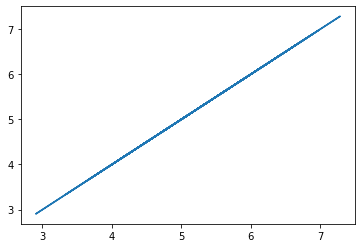

In [227]:
plt.plot(y_test,y_pred)

Random Forest Regression

In [228]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators = 10, random_state = 32)
regressor_forest.fit(X_train, y_train)
regressor_forest.score(X_test,y_test)

0.9082142208697525

So, we have found our best prediction model which is linear regression model.